# JTNN quickstart

First, install the package if you haven't already. If you use conda:

In [1]:
! conda create -n jtnn_env --file conda_list.txt

'conda' is not recognized as an internal or external command,
operable program or batch file.


Then

In [2]:
! pip install -e .

Obtaining file:///C:/Users/cs843/Documents/PhD/JTNN-VAE
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for jtnn


In [6]:
import os
import pickle
# Disable CUDA (workaround for GPU memory leak issue)
os.environ["CUDA_VISIBLE_DEVICES"]=""
import tqdm
import pandas as pd
from IPython.display import display
from fast_jtnn.fp_calculator import FingerprintCalculator
from fast_jtnn.mol_tree import main_mol_tree
from fast_molvae.preprocess import create_tensor_pickle
from fast_molvae.vae_train import main_vae_train
from rdkit import Chem
from sklearn.cluster import KMeans

In [7]:
# Verify that rdkit version is 2020.09.3 as
# version 2021.03.1 does not seem to work
import rdkit
rdkit.__version__

'2022.09.4'

In [15]:
#cd fast_molvae
main_mol_tree('../data/bbb_martins/train1_pos_smiles.txt', '../data/vocab_full.txt')
create_tensor_pickle('../data/bbb_martins/train1_pos_smiles.txt', '../data/tensors.pickle')
model = main_vae_train('../data/tensors.pickle', '../data/vocab_full.txt', '../data/models/', num_workers=8)
#AMES Pos


551it [00:07, 76.16it/s]


Input File read


c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


C1CC2CCC1C2
C1=NCCC1
JTNNVAE(
  (jtnn): JTNNEncoder(
    (embedding): Embedding(127, 450)
    (outputNN): Sequential(
      (0): Linear(in_features=900, out_features=450, bias=True)
      (1): ReLU()
    )
    (GRU): GraphGRU(
      (W_z): Linear(in_features=900, out_features=450, bias=True)
      (W_r): Linear(in_features=450, out_features=450, bias=False)
      (U_r): Linear(in_features=450, out_features=450, bias=True)
      (W_h): Linear(in_features=900, out_features=450, bias=True)
    )
  )
  (decoder): JTNNDecoder(
    (embedding): Embedding(127, 450)
    (W_z): Linear(in_features=900, out_features=450, bias=True)
    (U_r): Linear(in_features=450, out_features=450, bias=False)
    (W_r): Linear(in_features=450, out_features=450, bias=True)
    (W_h): Linear(in_features=900, out_features=450, bias=True)
    (W): Linear(in_features=478, out_features=450, bias=True)
    (U): Linear(in_features=478, out_features=450, bias=True)
    (U_i): Linear(in_features=900, out_features=450, b

In [12]:
!python sample.py \
--nsample 1377 \
--vocab ../data/vocab_full.txt \
--model ../data/models/model.completed

^C


In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
!python sample.py \
--nsample 5 \
--vocab ../data/vocab_full.txt \
--model ../data/models/model.completed

C1CC2CCC1C2


c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Generate vocabulary

In [8]:
main_mol_tree('data/train.txt', 'data/vocab_full.txt')

1170it [00:11, 103.05it/s]


## Tensorize training set molecules

In [4]:
create_tensor_pickle('data/train.txt', 'data/tensors.pickle')

Input File read


## Train VAE

In [4]:
cd fast_molvae

[WinError 2] The system cannot find the file specified: 'fast_molvae'
c:\Users\cs843\Documents\PhD\JTNN-VAE\fast_molvae


In [ ]:
model = main_vae_train('data/tensors.pickle', 'data/vocab_full.txt', 'data/models', num_workers=4)

In [3]:
#AMES NEG
!python sample.py \
--nsample 1170 \
--vocab ../data/vocab_full.txt \
--model ../data/models/model.completed

C1CNNN1
C1CCC2CCCOC3CCCCOC23OC1
C1=CCCCCCCC1
NO
C1=CCCCOCCCCCCCC1
C1=CNC=CC1
C1NCNN1
[NH4+]
[NH4+]
N1=PN=PN=P1
C#N
C1=CCCCOCCCCCCCC1
[NH3+][O-]
C1=CNC=CC1
C1=CCOC1
C1COCCOCCOCCOCCOCCOCCOCCOCCOCCO1
SS
C1NCNN1
C1CC2CCC(C2)O1
[NH3+][O-]
NS
C1CC2CCC(C1)N2
C1COCCOCCOCCOCCOC2(COCCOCCOCCOCCO1)COCCOCCOCCOCCOCCOCCOCCOCCOCC1(COCCOCCOCCOCCOCCOCCOCCOCC3(CNNN3)OC34NNNC3(OCCOCCOCCOCCOCCOCCOCCOCC3(COCCOCCOCCOCCOCCOCCOCCOCCOC56NNNC5(OCCOCCOCCOCCOCCOCCOCCOCCOCCO6)O3)OC35NNNC3(OCCOCCOCCOCCOCCOCCOCCOCCOCCO5)O4)O1)O2
C#N
C1COCO1
NS
C=S
C1=CCCC1
C1CC2CCC(C1)N2
C1=CNC=CC1
C1COCC[NH2+]1
C1COCCOCCOCCOCCOCCOCCOCCOCCOCCO1
C1CCCCCCOCCCCCC1
C1=CCNC1
N1=PN=PN=P1
C1=CCCC=CC1
C1COCCOCCOCCOCCOCCOCCOCCOCCOCCO1
C1CC2CCC(C2)O1
C1CNNN1
C[NH-]
C1COCCOCCOCCOCCOCCOCCOCCOCCOCCO1
C1CNNN1
C1=NCNCC1
C1CSCN1
C1COCCOCCOCCOCCOCCOCCOCCOCCOCCO1
C1CNNN1
C1=NCCN1
[NH3+][O-]
C1CCNC1
C1CCNC1
N1=PN=PN=P1
[NH4+]
C1OCOCO1
N=C1C2CCOC1CC2
C=S
C1CNNN1
C1CO1
C1=NSCCN1
NP
P=S
C1CNNN1
C1CCNC1
N=N
C[SH2+]
C1NCNN1
C1=CN=CCC1
C1COCO1
C1=CCCC1
NO
N1

c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
#AMES Pos
!python sample.py \
--nsample 1377 \
--vocab ../data/vocab_full.txt \
--model ../data/models/ames_pos/model.completed

In [14]:
#cyp2c19_veith pos
!python sample.py \
--nsample 5 \
--vocab ../data/vocab_full.txt \
--model ../data/models/model.completed

C1CNSC1
CS
C1CCCCC1
OS
C1CNCCO[Hg]OCCN1


c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [6]:
cd fast_molvae

c:\Users\cs843\Documents\PhD\JTNN-VAE\fast_molvae


## Check that it works

In [11]:
smiles_list = open("data/train.txt", "r").read().split()[:5000]

In [12]:
fp_calculator = FingerprintCalculator("data/models/model.completed", "data/vocab_full.txt")

In [13]:
smiles_list

['COc1ccc(N(C(=O)COc2ccccc2OC)S(=O)(=O)c2ccc(C)cc2)cc1',
 'CC(CC(=O)NC1CCCC1)c1ccccc1',
 'O=C(CSc1nc2nc(-c3cccs3)cc(C(F)(F)F)c2c(=O)[nH]1)NCc1ccco1',
 'CCCn1c(N)c(C(=O)CSc2nc(C)cs2)c(=O)n(C)c1=O',
 'O=[N+]([O-])c1ccc(C2CCCC/C2=N\\OCc2cccc(F)c2)c([N+](=O)[O-])c1',
 'COc1ccc(Oc2c(C=O)c3ccccc3n2C)cc1',
 'COc1ccc(/C=C2\\NC(=S)N(CC3CCCO3)C2=O)c(OC)c1',
 'COc1ccccc1CNc1nc(-c2ccc3c(c2)OCO3)nc2ccccc12',
 'CC(C)(C)n1nc(C2CC2)cc1NC(=O)Nc1ccc(Cl)cc1',
 'Cc1ccccc1-c1nccc(-n2ccnc2)n1',
 'Cc1ccc(CNC(=O)C2CC(c3ccccc3[N+](=O)[O-])=NO2)cc1',
 'Cc1ccc(NC(=O)N/C=C/c2ccco2)cc1C',
 'Cc1c(OCC(F)(F)F)ccnc1CSc1nc2ccccc2[nH]1',
 'CN(C)c1ccc(-c2cncnc2NCc2cccs2)cc1',
 'Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)N2CCCC2)c1C',
 'O=C(CSc1nc2ccccc2c(=O)n1CCCO)NCc1ccccc1',
 'Cc1ccc2c(c1)N(CC(=O)NC1CCCc3ccccc31)C(=O)CO2',
 'CCOC(=O)c1c(NC(=O)c2c(Br)cnn2C)c(C#N)nn1-c1ccccc1',
 'Cc1[nH][nH]c(=O)c1C(c1c(C)[nH][nH]c1=O)c1cn(Cc2cccc3ccccc23)c2ccccc12',
 'Cc1cc(NC(=O)c2c(F)cccc2F)n(-c2nc3ccccc3[nH]2)n1',
 'Cn1c(=O)n(C)c2cc(/C=N/n3cnn

In [14]:
%pdb on

Automatic pdb calling has been turned ON


In [14]:
fps = fp_calculator(smiles_list)

100%|██████████| 10/10 [03:06<00:00, 18.64s/it]


In [19]:
kmeans = KMeans(n_clusters=500, random_state=0).fit(fps)
labels = kmeans.labels_

In [20]:
db = pd.DataFrame()

In [21]:
db['smiles']=smiles_list
db['label']=labels

In [22]:
db

,smiles,label
0,COc1ccc(N(C(=O)COc2ccccc2OC)S(=O)(=O)c2ccc(C)c...,249
1,CC(CC(=O)NC1CCCC1)c1ccccc1,37
2,O=C(CSc1nc2nc(-c3cccs3)cc(C(F)(F)F)c2c(=O)[nH]...,95
3,CCCn1c(N)c(C(=O)CSc2nc(C)cs2)c(=O)n(C)c1=O,334
4,O=[N+]([O-])c1ccc(C2CCCC/C2=N\OCc2cccc(F)c2)c(...,231
...,...,...
1973,CCOc1ccc(OCc2ccc(C(=O)N3CCc4ccccc4C3)o2)cc1,499
1974,Cn1cc(-c2nc3cnc(N4CCNCC4)nc3n(CCc3ccccc3)c2=O)...,363
1975,Oc1ccc2oc3c(c2c1)CCCC3,283
1976,Cc1ccc(-c2ccc(/C=N/NC(=S)Nc3ccccc3)o2)cc1[N+](...,413


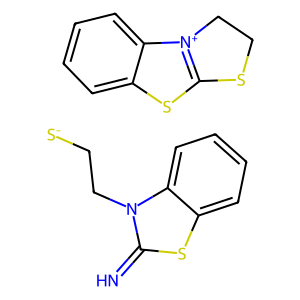

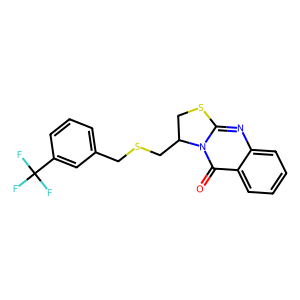

In [23]:
for smiles in db[db['label']==339]['smiles'].values:
    display(Chem.Draw.MolToImage(Chem.MolFromSmiles(smiles)))